In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from numpy import *
import sys
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
from pylab import plot,show,hist,figure,title

In [2]:
## Load datasets (download these files from dropbox into your local mention)
data_path = '/Users/sfiso desire/Desktop/Python Classes/Session 3 Python/'  ### change this path to location of the files in your local mention.
cesm_o2_200m_ds = xr.open_dataset(data_path+'cesm_o2_1850_2005_hist_200m_yr_ds.nc')
cesm_temp_200m_ds = xr.open_dataset(data_path+'cesm_temp_1850_2005_hist_200m_yr_ds.nc')
area_ds = xr.open_dataset(data_path+'cesm_area_m2_ds.nc').__xarray_dataarray_variable__

In [3]:
## display data content; variables and dimension 1
cesm_o2_200m_ds

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    O2         (year, nlat, nlon) float32 ...

In [4]:
## display data content; variables and dimension 2
cesm_temp_200m_ds

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP       (year, nlat, nlon) float32 ...

In [5]:
cesm_temp_200m_ds.TEMP

<xarray.DataArray 'TEMP' (year: 157, nlat: 384, nlon: 320)>
[19292160 values with dtype=float32]
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 20971.139
    member_id  int64 1
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [6]:
cesm_o2_200m_ds.O2

<xarray.DataArray 'O2' (year: 157, nlat: 384, nlon: 320)>
[19292160 values with dtype=float32]
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 20971.139
    member_id  int64 1
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Dissolved Oxygen
    units:         mmol/m^3
    grid_loc:      3111
    cell_methods:  time: mean

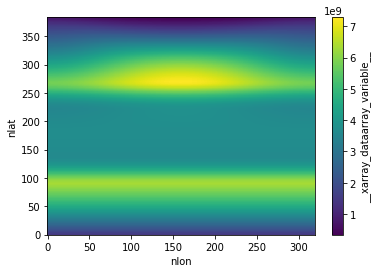

In [7]:
area_ds.plot()

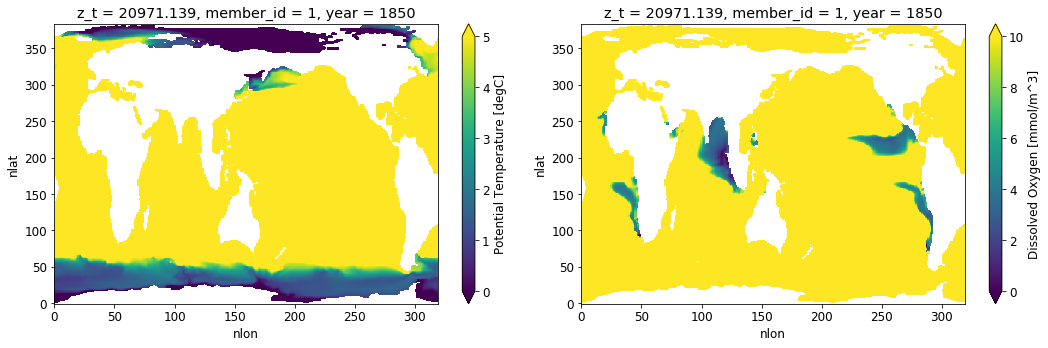

In [8]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 5)

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 10)

plt.tight_layout()

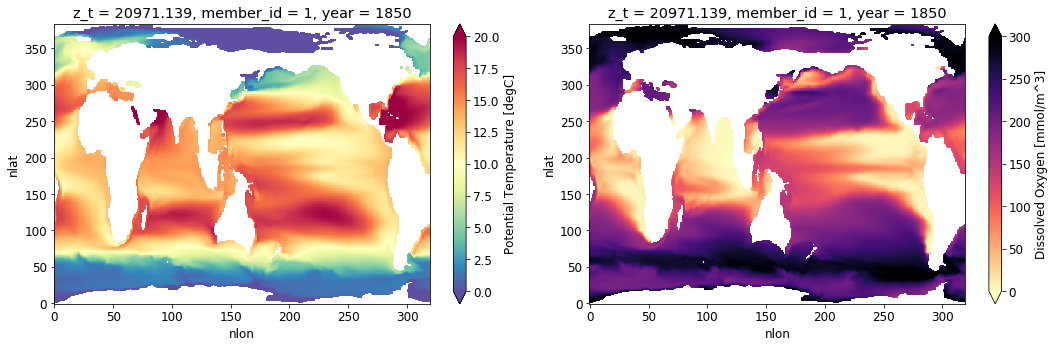

In [9]:
## Add colorbars
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 20,cmap = 'Spectral_r')

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 300,cmap = 'magma_r')

plt.tight_layout()

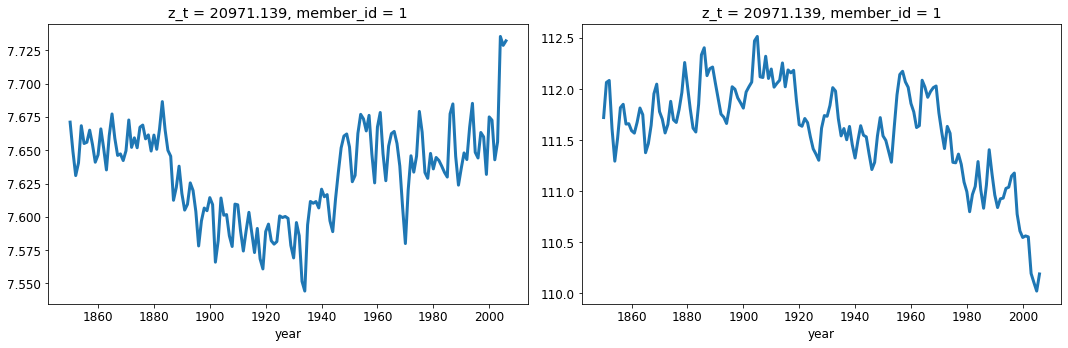

In [10]:
## computed a global mean time weighted (use area to compute a weighted mean)
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
((cesm_temp_200m_ds.TEMP*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.subplot(122)
((cesm_o2_200m_ds.O2*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.tight_layout()

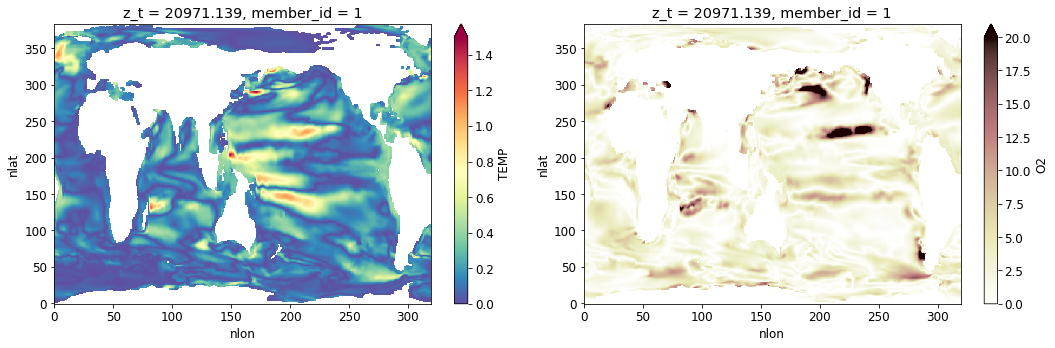

In [11]:
## Add colorbars
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1850,1960]).std('year').plot(vmin =0,vmax = 1.5,cmap = 'Spectral_r')

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1850,1960]).std('year').plot(vmin =0,vmax = 20,cmap = 'pink_r')

plt.tight_layout()

Exercises

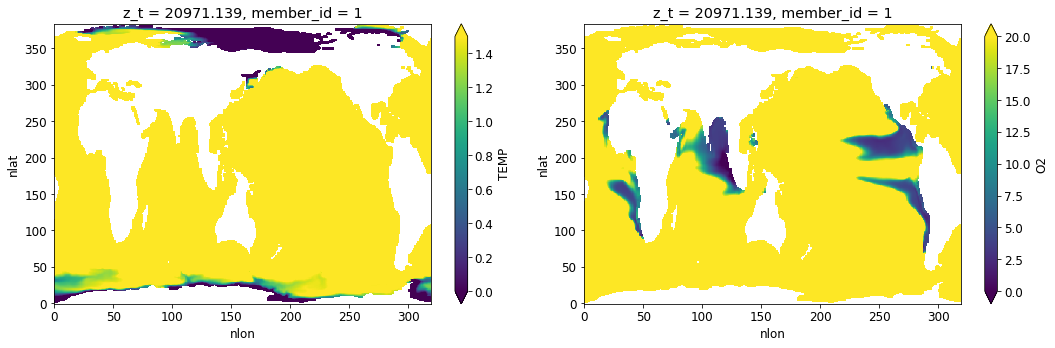

In [12]:
### Plot a map of Tempetarure and dissolved climatologial mean for the period 1960 - 2005

plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1960,2005]).mean('year').plot(vmin =0,vmax = 1.5)
#cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 30)

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1960,2005]).mean('year').plot(vmin =0,vmax = 20)
#cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 300)

plt.tight_layout()

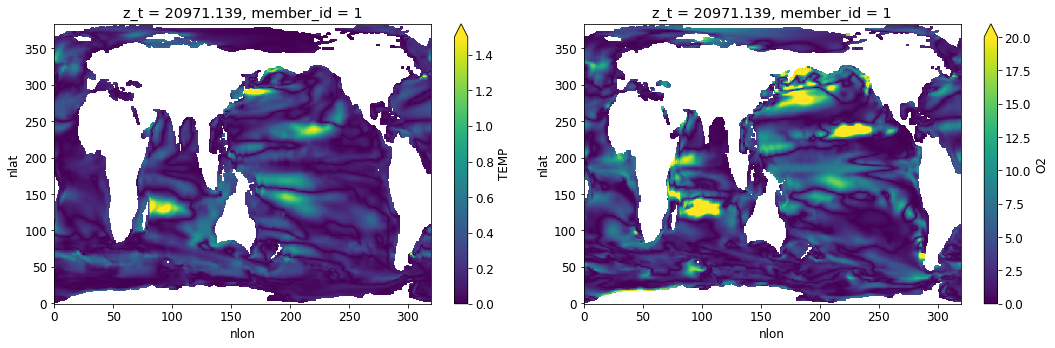

In [14]:
### Plot a map of Tempetarure and dissolved stardand deviation for the period 1960 - 2005
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1960,2005]).std('year').plot(vmin =0,vmax = 1.5)
#cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 30)

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1960,2005]).std('year').plot(vmin =0,vmax = 20)
#cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 300)

plt.tight_layout()

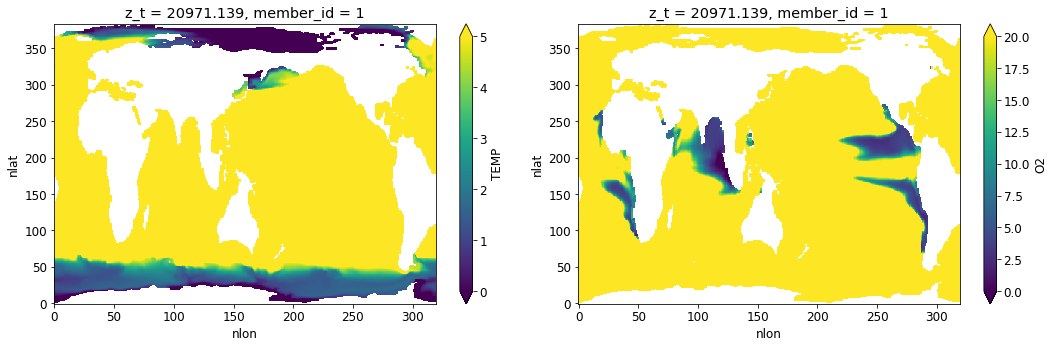

In [15]:
### Plot a map of Tempetarure and dissolved meadian for the period 1960 - 2005
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
cesm_temp_200m_ds.TEMP.sel(year = [1960,2005]).median('year').plot(vmin =0,vmax = 5)
#cesm_temp_200m_ds.TEMP.sel(year = 1850).plot(vmin = 0,vmax = 30)

plt.subplot(122)
cesm_o2_200m_ds.O2.sel(year = [1960,2005]).median('year').plot(vmin =0,vmax = 20)
#cesm_o2_200m_ds.O2.sel(year = 1850).plot(vmin = 0,vmax = 300)

plt.tight_layout()

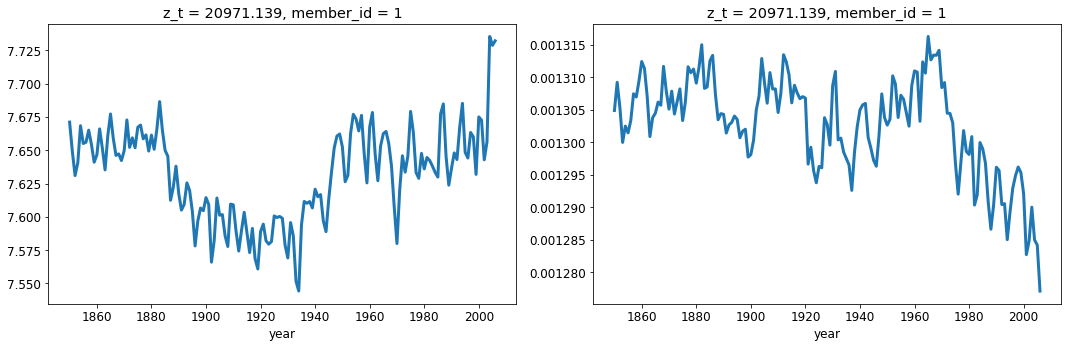

In [16]:
### Plot a time series of the global sum of temperature and dissolved meadian for the period 1850 - 2005
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)
((cesm_temp_200m_ds.TEMP*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.subplot(122)
((cesm_o2_200m_ds.O2*area_ds).median(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.tight_layout()

In [ ]:
### Calculate the correlation coeffient between Temperature and dissolved oxygen global means for period 1850 - 1960 and 1960 - 2005



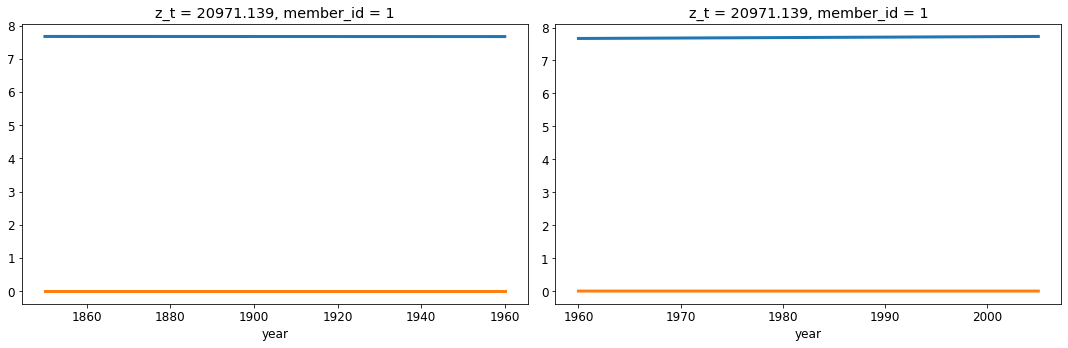

In [17]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(121)

(3//2)*((cesm_temp_200m_ds.TEMP*area_ds).sel(year = [1850,1960]).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
((cesm_o2_200m_ds.O2*area_ds).sel(year = [1850,1960]).mean(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
#((cesm_temp_200m_ds.TEMP.sel(year = [1960,2005])*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.subplot(122)
#((cesm_o2_200m_ds.O2*area_ds).sel(year = [1850,1960]).mean(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
((cesm_temp_200m_ds.TEMP.sel(year = [1960,2005])*area_ds).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()
((cesm_o2_200m_ds.O2*area_ds).sel(year = [1960,2005]).mean(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat']))).plot()

plt.tight_layout()

In [ ]:
max((cesm_temp_200m_ds.TEMP*area_ds).sel(year = [1850,1960]).sum(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat'])))


In [ ]:
max((cesm_o2_200m_ds.O2*area_ds).sel(year = [1850,1960]).mean(dim = ['nlon','nlat'])/(area_ds.sum(dim = ['nlon','nlat'])))

In [18]:
%%time
### Calculate the correlation coeffient between the global mean Temperature and dissolved oxygen for the period 1850 - 1960 and 1960 - 2005

## select time periods
time_1850_1960 = slice('1850', '1960') 
time_1960_2005 = slice('1960', '2005')
cesm_temp_200m_1850_1960_ds = cesm_temp_200m_ds.TEMP.sel(year = time_1850_1960)
cesm_temp_200m_1960_2005_ds = cesm_temp_200m_ds.TEMP.sel(year = time_1960_2005)

cesm_o2_200m_1850_1960_ds = cesm_o2_200m_ds.O2.sel(year = time_1850_1960)
cesm_o2_200m_1960_2005_ds = cesm_o2_200m_ds.O2.sel(year = time_1960_2005)

## computes the weighted mean 
cesm_temp_1850_1960_ts = (((cesm_temp_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_temp_1960_2005_ts = (((cesm_temp_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_o2_1850_1960_ts = (((cesm_o2_200m_1850_1960_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

cesm_o2_1960_2005_ts = (((cesm_o2_200m_1960_2005_ds*area_ds).sum(dim =\
                                                                     ['nlat','nlon']))/(area_ds.sum(dim = ['nlat','nlon'])))

print(np.corrcoef(cesm_temp_1850_1960_ts,cesm_o2_1850_1960_ts)[1,0])
print(np.corrcoef(cesm_temp_1960_2005_ts,cesm_o2_1960_2005_ts)[1,0])

-0.2026651232988914
-0.4478812636182475
Wall time: 1.37 s
